In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

idx = pd.IndexSlice

In [16]:
data = pd.read_csv(
    Path.cwd().parent /
    "results" /
    "pypsa-fes" /
    "csvs" /
    "flex_statistics.csv",
    index_col=[0,1],
    header=[0,1,2,3,4]
    )

cols = data.columns.droplevel([0,1,3]).to_frame()
cols.loc[cols.flexopts.str.contains("Unnamed"), "flexopts"] = "no flex"

data.columns = cols.set_index(["flexopts", "year"]).index
data = data.groupby(level=1).sum()

In [17]:
data

flexopts               int-tank-ss-v2g                              \
year                              2025          2030          2035   
CCGT                      1.941695e+07  1.014150e+07  8.063225e+05   
CCGT_energy               0.000000e+00  0.000000e+00  0.000000e+00   
CCGT_p_nom                3.771989e+04  2.229221e+04  7.369703e+03   
OCGT                      1.526413e+01  4.854637e+04  2.186159e+04   
OCGT_energy               0.000000e+00  0.000000e+00  0.000000e+00   
OCGT_p_nom                1.001010e+03  5.915901e+02  1.955770e+02   
abated combustion         3.599518e+01  3.796466e+01  3.778121e+06   
allam_energy              1.090763e+02  1.150444e+02  1.144885e+07   
allam_p_nom               3.118212e-02  3.973635e-02  1.124490e+04   
biogas upgrading         -9.019076e+00 -1.239326e+01 -1.595764e+01   
biomass                   0.000000e+00  0.000000e+00  0.000000e+00   
biomass_energy            0.000000e+00  0.000000e+00  0.000000e+00   
biomass_p_nom             6.686900e+03  6.686900e+03  6.686900e+03   
dac_atm                  -1.975108e+01 -2.470005e+01 -9.266987e+06   
dac_co2                   1.975108e+01  2.470005e+01  9.266987e+06   
distribution_p_nom        4.260280e+04  4.519112e+04  6.307855e+04   
modular nuclear_energy    0.000000e+00  0.000000e+00  0.000000e+00   
nuclear_energy            1.754869e+07  3.467973e+06  0.000000e+00   
nuclear_p_nom             0.000000e+00  0.000000e+00  0.000000e+00   
offwind-ac_energy         4.821462e+07  1.233747e+08  1.119224e+08   
offwind-dc_energy         3.534516e+07  2.135685e+07  1.198959e+08   
onwind_energy             5.889073e+07  7.053647e+07  8.067483e+07   
ror_energy                5.676742e+06  5.671514e+06  5.663162e+06   
solar-rooftop_energy      0.000000e+00  0.000000e+00  0.000000e+00   
solar_energy              2.526891e+07  4.561660e+07  6.235981e+07   
transmission_caplength    2.077462e+07  2.165170e+07  2.269962e+07   
transmission_s_nom        1.553133e+05  1.614748e+05  1.695395e+05   

flexopts                                                          \
year                            2040          2045          2050   
CCGT                    0.000000e+00  0.000000e+00  0.000000e+00   
CCGT_energy             0.000000e+00  0.000000e+00  0.000000e+00   
CCGT_p_nom              0.000000e+00  0.000000e+00  0.000000e+00   
OCGT                    0.000000e+00  0.000000e+00  0.000000e+00   
OCGT_energy             0.000000e+00  0.000000e+00  0.000000e+00   
OCGT_p_nom              0.000000e+00  0.000000e+00  0.000000e+00   
abated combustion       3.765152e+06  3.622937e+06  4.185033e+06   
allam_energy            1.140955e+07  1.097860e+07  1.268192e+07   
allam_p_nom             1.973600e+04  2.003352e+04  2.131154e+04   
biogas upgrading       -2.035143e+02 -2.777900e+01 -7.895563e+01   
biomass                 0.000000e+00  0.000000e+00  0.000000e+00   
biomass_energy          0.000000e+00  0.000000e+00  0.000000e+00   
biomass_p_nom           6.686900e+03  6.686900e+03  6.686900e+03   
dac_atm                -2.063177e+07 -3.355644e+07 -4.551657e+07   
dac_co2                 2.063177e+07  3.355644e+07  4.551657e+07   
distribution_p_nom      7.058626e+04  7.224174e+04  7.196633e+04   
modular nuclear_energy  0.000000e+00  0.000000e+00  0.000000e+00   
nuclear_energy          0.000000e+00  0.000000e+00  0.000000e+00   
nuclear_p_nom           0.000000e+00  0.000000e+00  0.000000e+00   
offwind-ac_energy       1.214691e+08  1.288047e+08  1.098878e+08   
offwind-dc_energy       1.542921e+08  1.279629e+08  1.515570e+08   
onwind_energy           7.708899e+07  9.345323e+07  8.514415e+07   
ror_energy              5.508400e+06  5.644302e+06  5.504720e+06   
solar-rooftop_energy    0.000000e+00  0.000000e+00  0.000000e+00   
solar_energy            7.357613e+07  8.664117e+07  9.351787e+07   
transmission_caplength  2.367230e+07  2.357034e+07  2.320771e+07   
transmission_s_nom      1.758342e+05  1.750593e+05  1.718205e+05 

In [18]:
data.columns.get_level_values(0).unique()

Index(['int-tank-ss-v2g', 'no flex', 'go-v2g', 'cosy', 'tank', 'int-v2g'], dtype='object', name='flexopts')

In [28]:
import pypsa

root = Path.cwd().parent / "results" / "pypsa-fes" / "networks"
template = 'elec_s_ec_lhnd__{}_LW_{}.nc'

def get_cost(flex, year):
    return pypsa.Network(root / template.format(flex, year)).objective / 1.15 * 1e-9

# get_cost = lambda flex, year: pypsa.Network(base / template.format(flex, year)).objective / 1.15

In [20]:

# base can 'none' or 'full'

flexopts = {
    "transport": {
        "none": {
            "off": "no flex",
            "constrained": "go-v2g",
            "flex": "int-v2g",
        },
        "full": {
            "off": "tank-ss",
            "constrained": "go-tank-ss-v2g",
            "flex": "int-tank-ss-v2g",
        },
    },

    "heat": {
        "none": {
            "off": "no flex",
            "constrained": "cosy",
            "flex": "tank",
        },
        "full": {
            "off": "int-ss-v2g",
            "constrained": "int-cosy-ss-v2g",
            "flex": "int-tank-ss-v2g",
        },
    },
}

texts = {
    "heat": {
        "none": "smart EVs OFF",
        "full": "smart EVs ON",
    },
    "transport": {
        "none": "smart HPs OFF",
        "full": "smart HPs ON",
    },
}

ylabels = {
    "int": "Change in Use of\nIntermittent Generation [TWh]",
    "cap": "Change in Dispatchable\nGeneration Capacity [GW]",
    "dis": "Change in Distribution\nCapacity [GW]",
    "tra": "Change in Total\nTransmission Capacity [GW]",
    "cos": "Change in Total\nYearly System Cost [£bn]",
}
intermittent = pd.Index(["solar", "onwind", "offwind-ac", "offwind-dc"])
conventional = pd.Index(["OCGT", "CCGT", "nuclear", "biomass", "allam"])

indexes = {
    "int": intermittent+"_energy",
    "cap": conventional+"_p_nom",
    "tra": pd.Index(['']) + "transmission_p_nom",
    "dis": pd.Index(['']) + "distribution_p_nom",
    "cos": None,
}

factors = {
    "int": 1e-6,
    "cap": 1e-3,
    "tra": 1e-3,
    "dis": 1e-3,
    "cos": 1e-9,
}

plot_direction = {
    "int": 1.,
    "cap": -1.,
    "tra": -1.,
    "dis": -1.,
    "cos": -1.,
}

INFO:pypsa.io:Imported network elec_s_ec_lhnd___LW_2025.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_ec_lhnd__go-v2g_LW_2025.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_ec_lhnd__int-v2g_LW_2025.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_ec_lhnd__tank-ss_LW_2025.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_ec_lhnd__go-tank-ss-v2g_LW_2025.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_ec_lhnd__int-tank-ss-v2g_LW_2025.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Importe

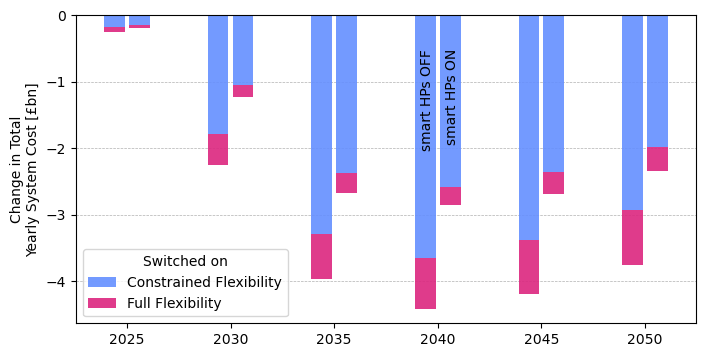

In [30]:
mode = "transport"
assert mode in ["transport", "heat"]

metric = "cos"
compare = True

assert metric in ["int", "cap", "tra", "dis", "cos"]

fig, ax = plt.subplots(figsize=(8, 4))

colors = {
    "transport": {
        "constrained": "#648FFF",
        "flex": "#DC267F",
    },
    "heat": {
        "constrained": "#FE6100",
        "flex": "#FFB000",
    },
}

width = 1

offset = width + 0.2

try:
    df = data.loc[indexes[metric], :].sum().mul(factors[metric])
except KeyError:
    pass

if not compare:
    width = 3
if not compare:
    hshift = 0.
else:
    hshift = 0.5

for j, year in enumerate(sorted(data.columns.get_level_values(1).unique().astype(int))):
    year = str(year)

    if compare: columns = ["none", "full"]
    else: columns = ["none"]

    for i, base in enumerate(columns):

        if metric != "cos":
            l = df.loc[idx[flexopts[mode][base]["off"], year]]
            m = df.loc[idx[flexopts[mode][base]["constrained"], year]]
            u = df.loc[idx[flexopts[mode][base]["flex"], year]]
        else:
            d = {'no flex': ''}

            fl = flexopts[mode][base]["off"]
            fm = flexopts[mode][base]["constrained"]
            fu = flexopts[mode][base]["flex"]

            l = get_cost(d.get(fl, fl), year)
            m = get_cost(d.get(fm, fm), year)
            u = get_cost(d.get(fu, fu), year)

        u = u - m
        m = m - l
        l = 0

        if i:
            const_kwargs = {"label": "constrained"}
            flex_kwargs = {"label": "full flex"}
        else:
            const_kwargs = {}
            flex_kwargs = {}

        if not (i + j):
            const_kwargs.update({"label": "Constrained Flexibility"})
            flex_kwargs.update({"label": "Full Flexibility"})
        else:
            const_kwargs.update({"label": None})
            flex_kwargs.update({"label": None})

        ax.bar(
            int(year) + (i - hshift)*offset,
            m-l,
            width=width,
            bottom=l,
            # bottom=0,
            color=colors[mode]["constrained"],
            alpha=0.9,
            **const_kwargs,
        )
        ax.bar(
            int(year) + (i - hshift)*offset,
            u,
            width=width,
            bottom=m,
            color=colors[mode]["flex"],
            alpha=0.9,
            **flex_kwargs,
        )

        if year == '2040':
            
            if plot_direction[metric] == 1:
                va = "bottom"
            elif plot_direction[metric] == -1:
                va = "top"

            if compare:
                ax.text(
                    2040 + (i - hshift) * offset + width * 0.1,
                    hshift * plot_direction[metric],
                    texts[mode][base],
                    rotation=90, va=va, ha="center",
                    )


ax.grid(axis="y", linestyle="dashed", linewidth=0.5)
ax.set_axisbelow(True)
ax.legend(title="Switched on")
ax.set_ylabel(ylabels[metric])

plt.savefig(f"temporal_{mode}_{metric}.pdf", bbox_inches="tight")
plt.show()

In [ ]:
flexopts["heat"]["none"]

{'off': 'no flex', 'constrained': 'cosy', 'flex': 'tank'}

In [30]:
from math import factorial as fac

fac(5)

120

#### Network analysis

In [99]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [101]:
base = Path.cwd().parent / "results" / "pypsa-fes" / "networks"
fn = "elec_s_ec_lcopt__{}_{}_{}.nc"
n1 = pypsa.Network(base / fn.format("", "LW", 2030))
n2 = pypsa.Network(base / fn.format("tank", "LW", 2030))

INFO:pypsa.io:Imported network elec_s_ec_lcopt___LW_2030.nc has buses, carriers, generators, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_ec_lcopt__tank_LW_2030.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


In [104]:
get_cap = lambda n: n.links.loc[n.links.carrier == "electricity distribution grid"]

print(get_cap(n1)["p_nom_opt"].sum())
print(get_cap(n2)["p_nom_opt"].sum())

54454.01685277586
54454.01685757768


In [107]:
idx = n1.loads.loc[n1.loads.carrier == "heat demand"].index

print(n1.loads_t.p_set[idx].sum().sum())
print(n2.loads_t.p_set[idx].sum().sum())

27875999.999999996
27875999.999999996


In [113]:
tank = n2.storage_units.loc[n2.storage_units.carrier == "hot water tank"]

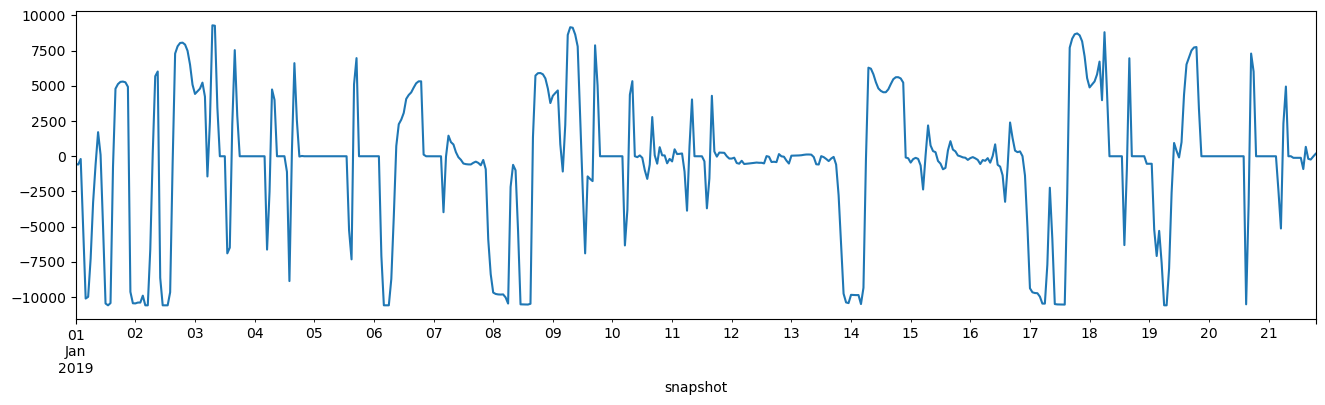

In [120]:
idx = tank.index

fig, ax = plt.subplots(figsize=(16, 4))

n2.storage_units_t.p[idx].iloc[:500].sum(axis=1).plot(ax=ax, label="tank")

plt.show()

In [123]:
print(get_cap(n1)[["p_nom", "p_nom_opt"]])
print(get_cap(n2)[["p_nom", "p_nom_opt"]])

                      p_nom     p_nom_opt
Link                                     
GB0 Z10 low voltage     0.0    940.732935
GB0 Z11 low voltage     0.0   6468.192104
GB0 Z12 low voltage     0.0   4081.172562
GB0 Z13 low voltage     0.0   4455.218122
GB0 Z14 low voltage     0.0  12826.459043
GB0 Z15 low voltage     0.0   1833.864906
GB0 Z16 low voltage     0.0   3555.773192
GB0 Z17 low voltage     0.0   1800.293728
GB0 Z1_3 low voltage    0.0    172.517936
GB0 Z1_4 low voltage    0.0    387.595886
GB0 Z2 low voltage      0.0    669.021164
GB0 Z3 low voltage      0.0    637.427028
GB0 Z5 low voltage      0.0   2981.877070
GB0 Z6 low voltage      0.0    522.351198
GB0 Z7 low voltage      0.0   2275.763549
GB0 Z8 low voltage      0.0   3948.277095
GB0 Z9 low voltage      0.0   6897.479335
                      p_nom     p_nom_opt
Link                                     
GB0 Z10 low voltage     0.0    940.732935
GB0 Z11 low voltage     0.0   6468.192104
GB0 Z12 low voltage     0.0   4081

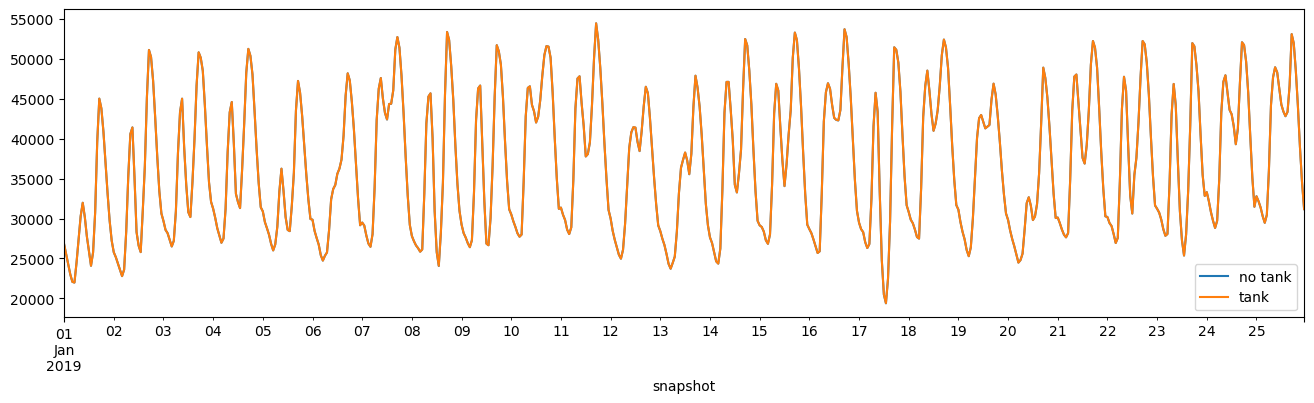

In [125]:
idx = get_cap(n1).index
fig, ax = plt.subplots(figsize=(16, 4))

n1.links_t.p0[idx].sum(axis=1).iloc[:600].plot(ax=ax, label="no tank")
n2.links_t.p0[idx].sum(axis=1).iloc[:600].plot(ax=ax, label="tank")

ax.legend()
plt.show()


In [5]:
from pathlib import Path
import geopandas as gpd

regions = gpd.read_file(Path.cwd().parent / "resources" / "pypsa-fes" / "regions_onshore_elec_s_eso.geojson").set_index("name")
regions.loc[regions.index[regions.index.str.contains("GB")]].shape

(20, 1)

In [6]:
from pathlib import Path
import pypsa

root = Path.cwd().parent / "results" / "pypsa-fes" / "networks"
template = 'elec_s_ec_lhnd__{}_LW_{}.nc'

years = [2025, 2030, 2035,  2040, 2045, 2050]
for year in years:

    n = pypsa.Network(root / template.format("", year))

    idx = n.loads.loc[n.loads.bus.str.contains("GB")].index
    print(year, n.loads_t.p_set[idx].sum().sum() * 1e-6)


INFO:pypsa.io:Imported network elec_s_ec_lhnd___LW_2025.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


2025 292.0926061781105


INFO:pypsa.io:Imported network elec_s_ec_lhnd___LW_2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


2030 340.208598131348


INFO:pypsa.io:Imported network elec_s_ec_lhnd___LW_2035.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


2035 415.5817262545088


INFO:pypsa.io:Imported network elec_s_ec_lhnd___LW_2040.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


2040 448.1697935786606


INFO:pypsa.io:Imported network elec_s_ec_lhnd___LW_2045.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


2045 459.16076859069153


INFO:pypsa.io:Imported network elec_s_ec_lhnd___LW_2050.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


2050 461.84977489531906


In [8]:
import numpy as np

years = [2025, 2030, 2035, 2040, 2045, 2050]
reductions = [-1, 2.5, 4.7, 5.2, 5.1, 4.9]

cumsum = 0

for year1, year2, red1, red2 in zip(years[:-1], years[1:], reductions[:-1], reductions[1:]):
    cumsum += 5 * np.mean([red1, red2])

cumsum


97.25